In [3]:
import numpy as np
import pandas as pd

In [4]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})
df

,beta,exponential,normal_p,normal_l
0,53.744604,10.667946,10.959813,4.058451
1,45.096146,1.108936,11.971496,18.779978
2,48.630986,10.095306,10.745455,13.633294
3,49.051454,0.152219,9.975641,15.765356
4,58.974183,47.921070,6.899586,7.078187
...,...,...,...,...
995,50.961243,20.341502,11.961434,25.047235
996,59.782279,9.407191,13.082400,1.265043
997,36.006663,0.156868,7.055905,16.181984
998,57.439275,11.343483,7.996781,13.992972


In [6]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal
df

,beta,exponential,normal_p,normal_l,bimodal
0,53.744604,10.667946,10.959813,4.058451,21.606112
1,45.096146,1.108936,11.971496,18.779978,18.306628
2,48.630986,10.095306,10.745455,13.633294,17.578925
3,49.051454,0.152219,9.975641,15.765356,17.925321
4,58.974183,47.921070,6.899586,7.078187,25.370906
...,...,...,...,...,...
995,50.961243,20.341502,11.961434,25.047235,-19.570870
996,59.782279,9.407191,13.082400,1.265043,-20.349044
997,36.006663,0.156868,7.055905,16.181984,-20.187166
998,57.439275,11.343483,7.996781,13.992972,-21.125175


In [34]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
df

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,53.744604,10.667946,10.959813,4.058451,21.606112,9.870219e+05
1,45.096146,1.108936,11.971496,18.779978,18.306628,1.015074e+06
2,48.630986,10.095306,10.745455,13.633294,17.578925,1.013651e+06
3,49.051454,0.152219,9.975641,15.765356,17.925321,9.828114e+05
4,58.974183,47.921070,6.899586,7.078187,25.370906,1.004254e+06
...,...,...,...,...,...,...
995,50.961243,20.341502,11.961434,25.047235,-19.570870,1.010625e+06
996,59.782279,9.407191,13.082400,1.265043,-20.349044,9.946472e+05
997,36.006663,0.156868,7.055905,16.181984,-20.187166,9.986732e+05
998,57.439275,11.343483,7.996781,13.992972,-21.125175,9.812435e+05


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

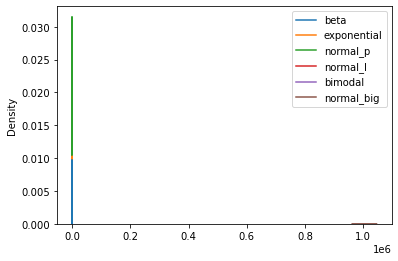

In [36]:
sns.kdeplot(data=df)
plt.show()

In [17]:
#Chuẩn hóa theo Z-score
from sklearn.preprocessing import StandardScaler as SS

<AxesSubplot:ylabel='Density'>

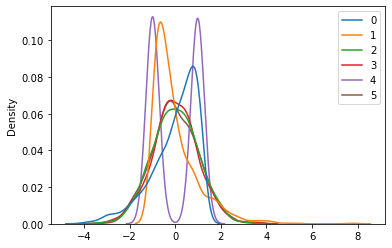

In [37]:
ss_ = SS()
df2 = ss_.fit_transform(df)
# display(df2)
sns.kdeplot(data=df2)

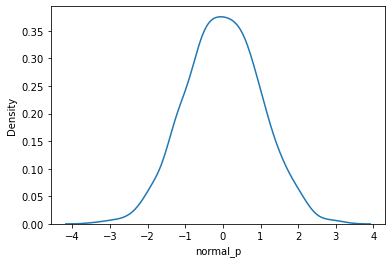

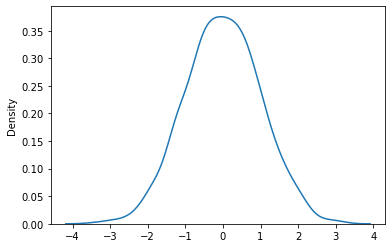

In [38]:
#Tính thủ công
z = (df['normal_p']-df['normal_p'].mean())/df['normal_p'].std()
sns.kdeplot(data=z) #Kết quả tính thủ công
plt.show()
sns.kdeplot(data=df2[:,2]) #Kết quả sử dụng thư viện
plt.show()

In [39]:
#Chuẩn hóa bằng Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler as MM

<AxesSubplot:ylabel='Density'>

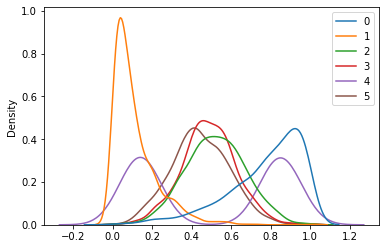

In [41]:
mm_ = MM()
df3 = mm_.fit_transform(df)
sns.kdeplot(data=df3)

<AxesSubplot:ylabel='Density'>

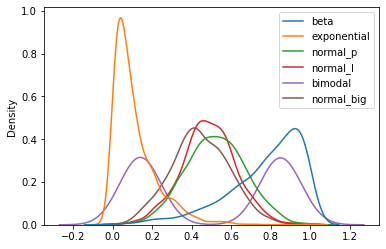

In [45]:
#Làm thủ công
X_std = (df-df.min(axis=0))/(df.max(axis=0)-df.min(axis=0))
X_scaled = X_std * (1 - 0) + 0
# X_scaled = X_std * (df.max() - df.min()) + df.min()
sns.kdeplot(data=X_scaled)

In [46]:
#Sử dụng RobustScaler
from sklearn.preprocessing import RobustScaler as RS

<AxesSubplot:ylabel='Density'>

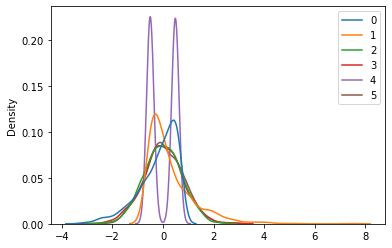

In [48]:
rs_ = RS()
df4 = rs_.fit_transform(df)
sns.kdeplot(data=df4)

<AxesSubplot:ylabel='Density'>

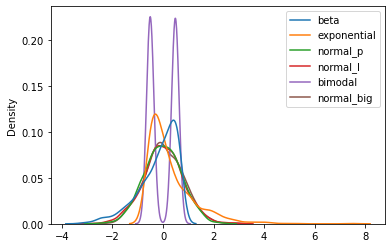

In [50]:
#Tính thủ công
Q1 = df.quantile(0.25)
Q2 = df.quantile(0.5)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
X_scaled = (df-Q2)/IQR
sns.kdeplot(data=X_scaled)

<AxesSubplot:ylabel='Density'>

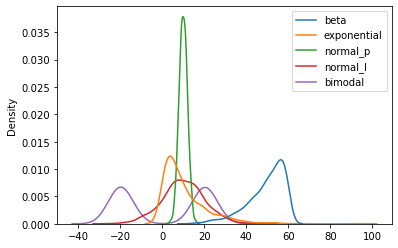

In [55]:
sns.kdeplot(data=df.iloc[:,:5])

<AxesSubplot:ylabel='Density'>

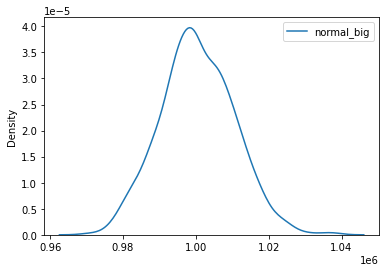

In [57]:
sns.kdeplot(data=df.iloc[:,5:])

<AxesSubplot:ylabel='Density'>

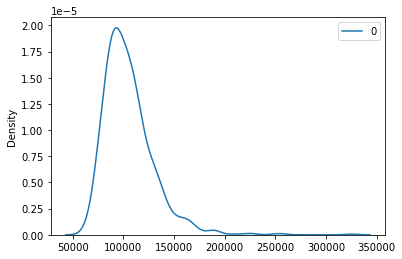

In [77]:
a1 = np.array(df.iloc[:,5:])
a2 = np.array(df.iloc[:,2:3])
a3 = a1/a2
sns.kdeplot(data=a3)

<AxesSubplot:ylabel='Density'>

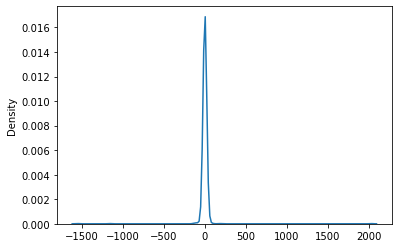

In [80]:
a11 = df4[:,5]/df4[:,2]
sns.kdeplot(data=a11)